## # Introduction
<p><img src="https://assets.datacamp.com/production/project_981/img/lego_unsplash.jpg" alt="A picture of Lego characters!"></p>
<h3 id="letslookatlegosets">Let's look at Lego sets!</h3>
<p>Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.</p>
<p>It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in <a href="https://www.businessinsider.com/how-lego-made-a-huge-turnaround-2014-2?r=US&IR=T">this article</a>, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.</p>
<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. Feel free to add as many cells as necessary. Finally, remember that you are only tested on your answer, not on the methods you use to arrive at the answer!</p>
<p><em><strong>Note:</strong> If you haven't completed a DataCamp project before you should check out the <a href="https://projects.datacamp.com/projects/33">Intro to Projects</a> first to learn about the interface. In this project, you also need to know your way around <code>pandas</code> DataFrames and it's recommended that you take a look at the course <a href="https://www.datacamp.com/courses/data-manipulation-with-pandas">Data Manipulation with pandas</a>.</em></p>

<a id='toc'></a>
# Table of Contents
1. [Loading and Exploring the Datasets](#step1)

    1.1 [Dataset: Parent Themes](#step1.1)
    
    1.2 [Dataset: Lego Sets](#step1.2)

2. [Cleaning the Data](#step2)
3. [Preparing the Dataset for Analysis](#step3)
4. [Answering the Questions](#step4)

    4.1 [Question 1: What percentage of all licensed sets ever released were Star Wars themed?](#step4.1)
    
    4.2 [Question 2: In which year was Star Wars not the most popular licensed theme (in terms of number of sets released that year)?](#step4.2)

5. [Conclusion](#step5)


<a id='step1'></a>
# 1. Loading and Exploring the Datasets
<a id='step1.1'></a>
## 1.1 Dataset: Parent Themes
First, I take a look at the data from the parents themes dataset to get familiar with the data and its structure. After loading the dataset, I investigate its general structure by taking a look on the first rows of the dataset. In addition, I check the number of total rows and the number of unique parent themes in the dataset.

I also checked the information of the partent theme with the name *Star Wars* as I am interested in this parent theme for the subsequent analysis to answer the two questions by the account executive who is responsible for the *Star Wars* partnership.

As a part of exploring the dataset, I investigated the cleanliness of the data in terms of missing values in the features (columns) of the dataset.

[Back to Table of Content](#toc)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


'Number of rows: 111'

'Number of unique parent themes by name: 111'

,id,name,is_licensed
7,158,Star Wars,True


<Figure size 720x432 with 0 Axes>

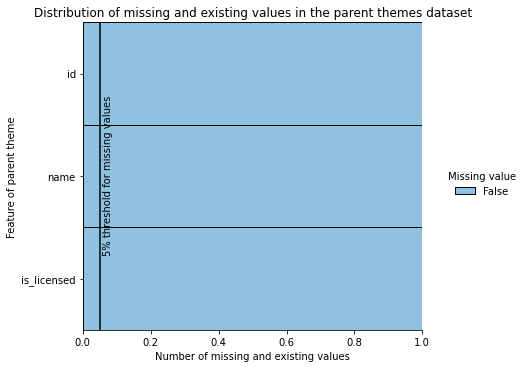

In [7]:
# Use this cell to begin your analyses, and add as many cells as you would like!
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

parent_themes = pd.read_csv('datasets/parent_themes.csv')
display(parent_themes.head())
display('Number of rows: ' + str(parent_themes.shape[0]))
display('Number of unique parent themes by name: ' + str(parent_themes['name'].nunique()))
display(parent_themes[parent_themes['name'] == 'Star Wars'])

plt.figure(figsize=(10,6))
ax = sns.displot(
    data=parent_themes.isna().melt(value_name='Missing value'),
    y='variable',
    hue='Missing value',
    palette='Blues',
    multiple='fill',
    aspect=1.25
)
ax.set(title='Distribution of missing and existing values in the parent themes dataset', xlabel='Number of missing and existing values', ylabel='Feature of parent theme')
plt.axvline(0.05, 0,1, color='black')
plt.text(0.06,1.75,'5% threshold for missing values',rotation=90)
plt.show()

## Results:
The analysis shows that there are 111 data points (rows) in the parent themes dataset with 111 unique names for parent themes. *Star Wars* is the parent theme with the ID *158* and it *is licensed*. The distribution plot shows that there are *no missing values in the entire parent themes dataset*.

For this reason, there is no need for any further data cleaning with respect to the *parent theme* data set.

<a id='step1.2'></a>
## 1.2 Dataset: Lego Sets
Second, I take a look at the data from the Lego sets dataset to get familiar with the data and its structure. This analysis is similar to the previous one of the parent themes dataset. After loading the dataset, I investigate its general structure by taking a look on the first rows of the dataset. In addition, I check the number of total rows and the number of unique Lego sets based on the unique set number (**set_num**) in the dataset.

I also checked the the number of unique Lego sets based on the unique set number (**set_num**) with *Star Wars* as their parent theme as I am interested in these Lego sets for the subsequent analysis to answer the two questions by the account executive who is responsible for the *Star Wars* partnership.

As a part of exploring the dataset, I investigated the cleanliness of the data in terms of missing values in the features (columns) of the dataset.

[Back to Table of Content](#toc)

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


'Number of rows: 11986'

'Number of unique Lego sets by set number: 11833'

'Number of unique Lego sets with Star Wars as parent theme: 609'

<Figure size 720x432 with 0 Axes>

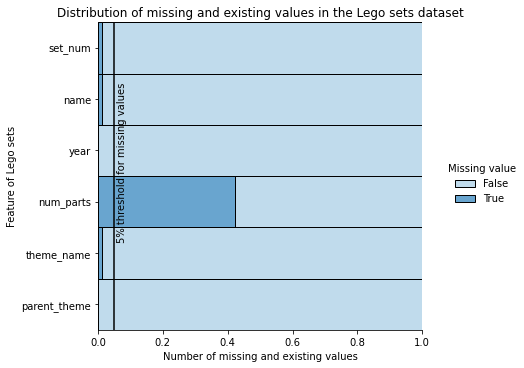

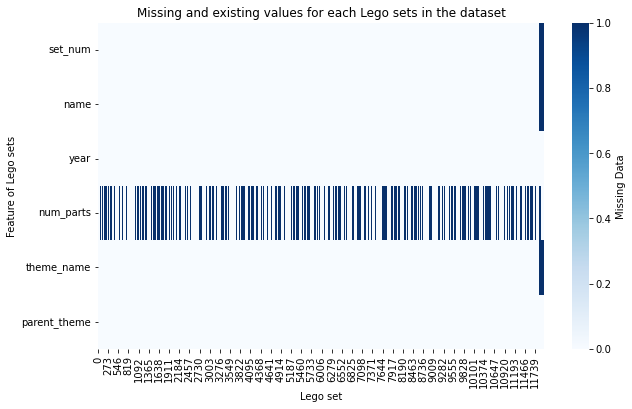

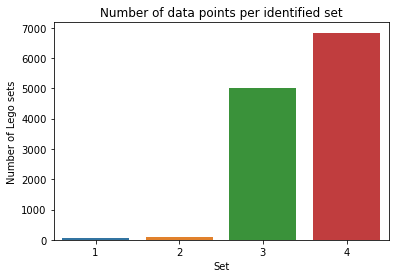

In [8]:
lego_sets = pd.read_csv('datasets/lego_sets.csv')
display(lego_sets.head())
display('Number of rows: ' + str(lego_sets.shape[0]))
display('Number of unique Lego sets by set number: ' + str(lego_sets['set_num'].nunique()))
display('Number of unique Lego sets with Star Wars as parent theme: ' + str(lego_sets[lego_sets['parent_theme'] == 'Star Wars']['set_num'].nunique()))

plt.figure(figsize=(10,6))
ax1 = sns.displot(
    data=lego_sets.isna().melt(value_name='Missing value'),
    y='variable',
    hue='Missing value',
    palette='Blues',
    multiple='fill',
    aspect=1.25
)

ax1.set(title='Distribution of missing and existing values in the Lego sets dataset', xlabel='Number of missing and existing values', ylabel='Feature of Lego sets')
plt.axvline(0.05, 0,1, color='black')
plt.text(0.06,3.75,'5% threshold for missing values',rotation=90)
plt.show()

plt.figure(figsize=(10,6))
ax2 = sns.heatmap(lego_sets.isna().transpose(),
            cmap="Blues",
            cbar_kws={'label': 'Missing Data'})
ax2.set(title='Missing and existing values for each Lego sets in the dataset', xlabel='Lego set', ylabel='Feature of Lego sets')
plt.show()

sets_of_missing_values = lego_sets.isna().groupby(['set_num', 'name', 'num_parts', 'theme_name'])['parent_theme'].value_counts()
ax3 = sns.barplot(x=sets_of_missing_values.index, y=sets_of_missing_values.values, data=sets_of_missing_values)
ax3.set(title='Number of data points per identified set', xlabel='Set', ylabel='Number of Lego sets')
#ax3.bar_label(ax3.containers[0])
ax3.set_xticklabels([1,2,3,4])
plt.show()


## Results:
The analysis shows that there are 11986 data points (rows) in the Lego sets dataset with 11833 unique Lego sets based on the set number (**set_num**). *Star Wars* is the parent theme of 609 unique Lego sets. The distribution plot shows that there are *missing values in the Lego sets dataset* for the columns **set_num**, *name*, *num_parts*, and *theme_name*. In more detail, the heatmap shows that there are four differnt sets of Lego sets (data points):
* Set 1: Lego sets with missing values for **set_num**, *name*, *num_parts*, and *theme_name*
* Set 2: Lego sets with missing values for **set_num**, *name*, and *theme_name*
* Set 3: Lego sets with missing values for *num_parts*
* Set 4: Lego sets without missing values

In particular, I found that:
* Set 1 contains 62 Lego sets with missing values for **set_num**, *name*, *num_parts*, and *theme_name* 
* Set 2 contains 91 Lego sets with missing values for **set_num**, *name*, and *theme_name*
* Set 3 contains 4998 Lego sets with missing values for *num_parts*
* Set 4 contains 6835 Lego sets without missing values 

Based on these findings, I need to clean the data from the Lego sets dataset as only this dataset contains data point with missing values. According to my results, the Lego sets (data points) with missing values in the columns **set_num**, *name*, and *theme_name* affect less than 5% of the entire data set. For this reason, the respective Lego sets with missing values can be removed from the entire dataset.

This decision affects in particular the **set_num** column which is critical for this analysis. However, the removel of these Lego sets is acceptable as a missing value in the column **set_num** indicates that the respective Lego set is a duplicate or invalid. For this reason, I do not lose important information that is necessary to answer buisiness questions of the account executive responsible for the *Star Wars* partnership.

<a id='step2'></a>
# 2. Cleaning the Data
Based on the findings from the previous section, I can clean the data by removing all data points (rows) that miss values for the features (columns) **set_num**, *name*, and *theme_name*.

[Back to Table of Content](#toc)

In [9]:
clean_lego_sets = lego_sets.dropna(subset=['set_num', 'name', 'theme_name']) 
display('Number of unique lego sets by set number: ' + str(clean_lego_sets['set_num'].nunique()))

'Number of unique lego sets by set number: 11833'

## Result:
After removing the datapoints, the cleaned Lego sets dataset contains 11833 datapoints (rows) which corresponds to the findings that the Lego set data sets contains 11833 unique Lego sets with a set number.

<a id='step3'></a>
# 3. Preparing the Dataset for Analysis
In the following, I combine the two datasets parent themes and the cleaned Lego sets for the further analysis. I remove all data points of Lego sets that are not licensed as both questions of the account executive who is responsible for the *Star Wars* partnership only address Lego sets repectively parent themes that are licensed.

[Back to Table of Content](#toc)

In [10]:
merged_data_set = pd.merge(clean_lego_sets, parent_themes, left_on='parent_theme', right_on='name', suffixes=("_lego_sets", "_parent_themes"))

merged_data_set = merged_data_set.drop(columns=['name_parent_themes'])

analysis_data_set = merged_data_set[merged_data_set['is_licensed'] == True]
display(analysis_data_set.head())

,set_num,name_lego_sets,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


<a id='step4'></a>
# 4. Answering the Questions
<a id='step4.1'></a>
## 4.1. Question 1: What percentage of all licensed sets ever released were Star Wars themed?

First, I dertermine the number of all licensed Lego sets. Second, I determine the number of all licensed Lego sets that are Star Wars themed. Based on these numbers, I can calculate the ratio and thus the percentage that is requested by the account executive.

[Back to Table of Content](#toc)

In [11]:
number_of_unique_licensed_lego_sets = analysis_data_set['set_num'].nunique()
display('Number of unique licensed Lego sets by set number: ' + str(number_of_unique_licensed_lego_sets))

number_of_star_wars_sets = analysis_data_set[analysis_data_set.parent_theme == 'Star Wars']['set_num'].count()
display('Number of Star War Lego sets: ' + str(number_of_star_wars_sets))

the_force = int((number_of_star_wars_sets / number_of_unique_licensed_lego_sets) * 100)
display('Anwer: The percentage of all licensed sets ever released that were Star Wars themed is: ' + str(the_force))

'Number of unique licensed Lego sets by set number: 1179'

'Number of Star War Lego sets: 609'

'Anwer: The percentage of all licensed sets ever released that were Star Wars themed is: 51'

## Answer:
The percentage of all licensed Lego sets ever released that were *Star Wars* themed is 51, meaning that more then half of all licensed Lego sets that have ever been released belong to the to *Star Wars*. As a result, *Star Wars* is the parent theme with the most licensed Lego sets ever, indicating the importance of the partnership between Lego and *Star Wars*.

<a id='step4.2'></a>
## 4.2. Question 2: What percentage of all licensed sets ever released were Star Wars themed?

First, I answer this question using a visual approach. For this purpose, I create a dataframe that includes number of Lego sets with a specific parent theme per year and parent theme. Based on this information, I create a line plot that shows how the number of Lego sets changed over the years grouped by the parent themes.

Second, I answer this question using a computational approach. For this purpose, I create  a pivot tables that shows the number of Lego sets per year and parent theme in this case. In this table, I can search for the case where the number of Lego sets with the *Star Wars* theme is smaller than the maximum value of the number of Lego sets for all parten themes in the entire table.

Both approach must lead to the same result.

[Back to Table of Content](#toc)

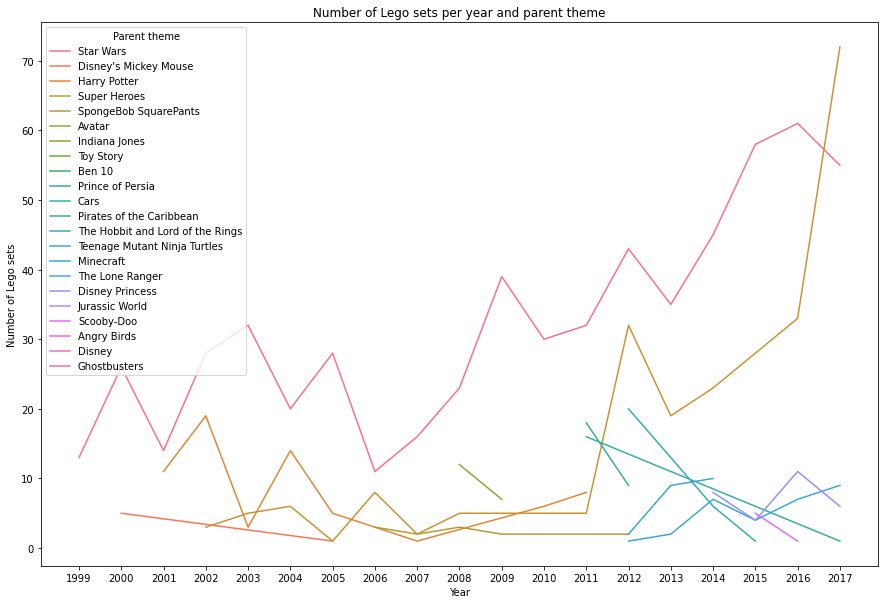

'Answer: Star Wars was not the most popular licensed theme (in terms of number of sets released) in 2017.'

In [12]:
parent_theme_count = analysis_data_set[['year', 'parent_theme']].groupby('year')['parent_theme'].value_counts()
parent_theme_count = parent_theme_count.to_frame('count').reset_index()

plt.figure(figsize=(15,10))
ax4 = sns.lineplot(data=parent_theme_count, x="year",y="count",hue="parent_theme")
ax4.set_xticks(np.arange(analysis_data_set['year'].min(), analysis_data_set['year'].max()+1, 1))
ax4.set(title='Number of Lego sets per year and parent theme', xlabel='Year', ylabel='Number of Lego sets')
plt.legend(title='Parent theme')
plt.show()

pivot_table = pd.pivot_table(parent_theme_count, values='count', index='year', columns='parent_theme').fillna(0)
new_era = pivot_table[pivot_table['Star Wars'] < pivot_table.max(axis='columns')].index[0]

display('Answer: Star Wars was not the most popular licensed theme (in terms of number of sets released) in ' + str(new_era) + '.')

## Answer:
Only in 2017, *Star Wars* was not the most popular licensed theme in terms of number of sets released per year. However, the line plot shows that *Star Wars* was the most popular licensed theme in all other years. In 2017, only the *Super Heroes* them was more popular.

This finding is important for the *Star Wars* team as it might require to rethink their current strategy. From the point of view of the accoun executive, his result is useful to strengthen one's position when it comes to ensuring sales figures through a larger quantity of *tar Wars* sets. In addition, this result would explain a decrease in the sales figures as the other *Super Heroes* theme had more Lego sets.

However, such a difference is only an assumption based on the idea that selling more Lego sets of a specific theme also leads to more sales and thus turnover. This assumption needs to be examined with additional data, such as the numbers of times each Lego set was sold and the price of the Lego set.

<a id='step5'></a>
# 5. Conclusion
With this analysis, I am able to answer the two questions by the account executive who is responsible for the *Star Wars* partnership. While the results of the first question show that Lego sets with the *Star Wars* theme account for more than 50% of all licensed Lego sets, the results of the second question show that in 2017 *Star Wars* was not any longer the most popular licensed theme.

As the account executive did not indicate why this information is needed, it can be useful in several ways. First, the data can explain a probable reduction in the sales numbers as another theme (*Super Hereos*) had more licensed Lego sets. This reduction of sales numbers is only a assumption based on the premise that more licensed Lego sets lead to higher sales numbers and turnover. For such an analysis, more information is required such as the number of times each Lego set was solf and the price of each Lego set. Second, these results can be useful to motivate the *Star Wars* team to reclaim their first place as the most popular licensed theme. 

In this analysis, I only focused on the licensed Lego sets. However, according to the results only 1179 Lego sets are licensed and the entire dataset contains more than 11000 Lego sets. In this context, it might be also of interest how the number of parts (*num_parts*) have an influence on the popularity of a Lego set.

For example, we could investigate the following questions:
How many parts do licensed Lego sets have compared to the non-licensed Lego sets?
How does the number of parts differ between the parent themes?

As a summary, the *Star Wars* theme includes more than 50% (exactly 51%) of all licensed Lego sets ever released. In this way, the *Star Wars* theme is currently the theme with the largest number of Lego sets overall. However, in 2017 *Star Wars* was not the most popular licensed theme in terms of number of sets released per year, as the *Super Heroes* theme had more licensed Lego sets.

[Back to Table of Content](#toc)